In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import sklearn 

from ibex import trans

from ibex.sklearn.decomposition import PCA as PDPCA
from ibex.sklearn.cluster import KMeans as PDKmeans

from ibex.sklearn.preprocessing import StandardScaler as PDStScaler
from ibex.sklearn.preprocessing import Imputer as PDImputer

from ibex.sklearn.linear_model import LinearRegression as PDLinearRegression
from ibex.sklearn.svm import SVR as PDSVR
from ibex.sklearn.ensemble import GradientBoostingRegressor as PDGradientBoostingRegressor

from ibex.sklearn import model_selection as pd_model_selection

import seaborn as sns

%pylab inline

ImportError: cannot import name 'StandardScaler'

In [1]:
from ibex.sklearn.preprocessing import StandardScaler

ImportError: cannot import name 'StandardScaler'

In [ ]:
imdb = pd.read_csv('/Users/taliraveh/Documents/EDA/movies/movie_metadata.csv')

In [2]:
import sys

In [3]:
sys.executable

'/usr/bin/python3'

### Basic

In [3]:
imdb.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


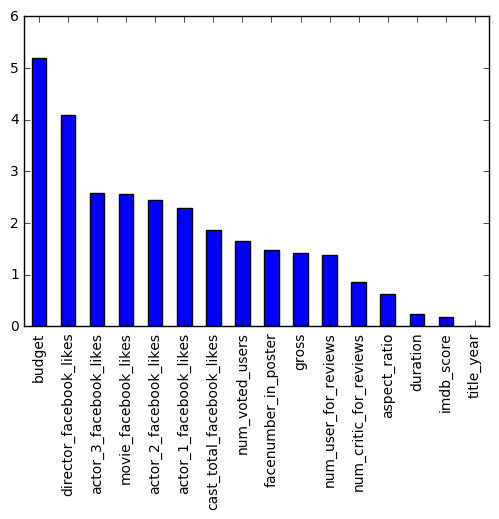

In [4]:
#Most varying
description = imdb.describe().transpose()
(description['std'] / description['mean']).sort_values(ascending=False).plot.bar()

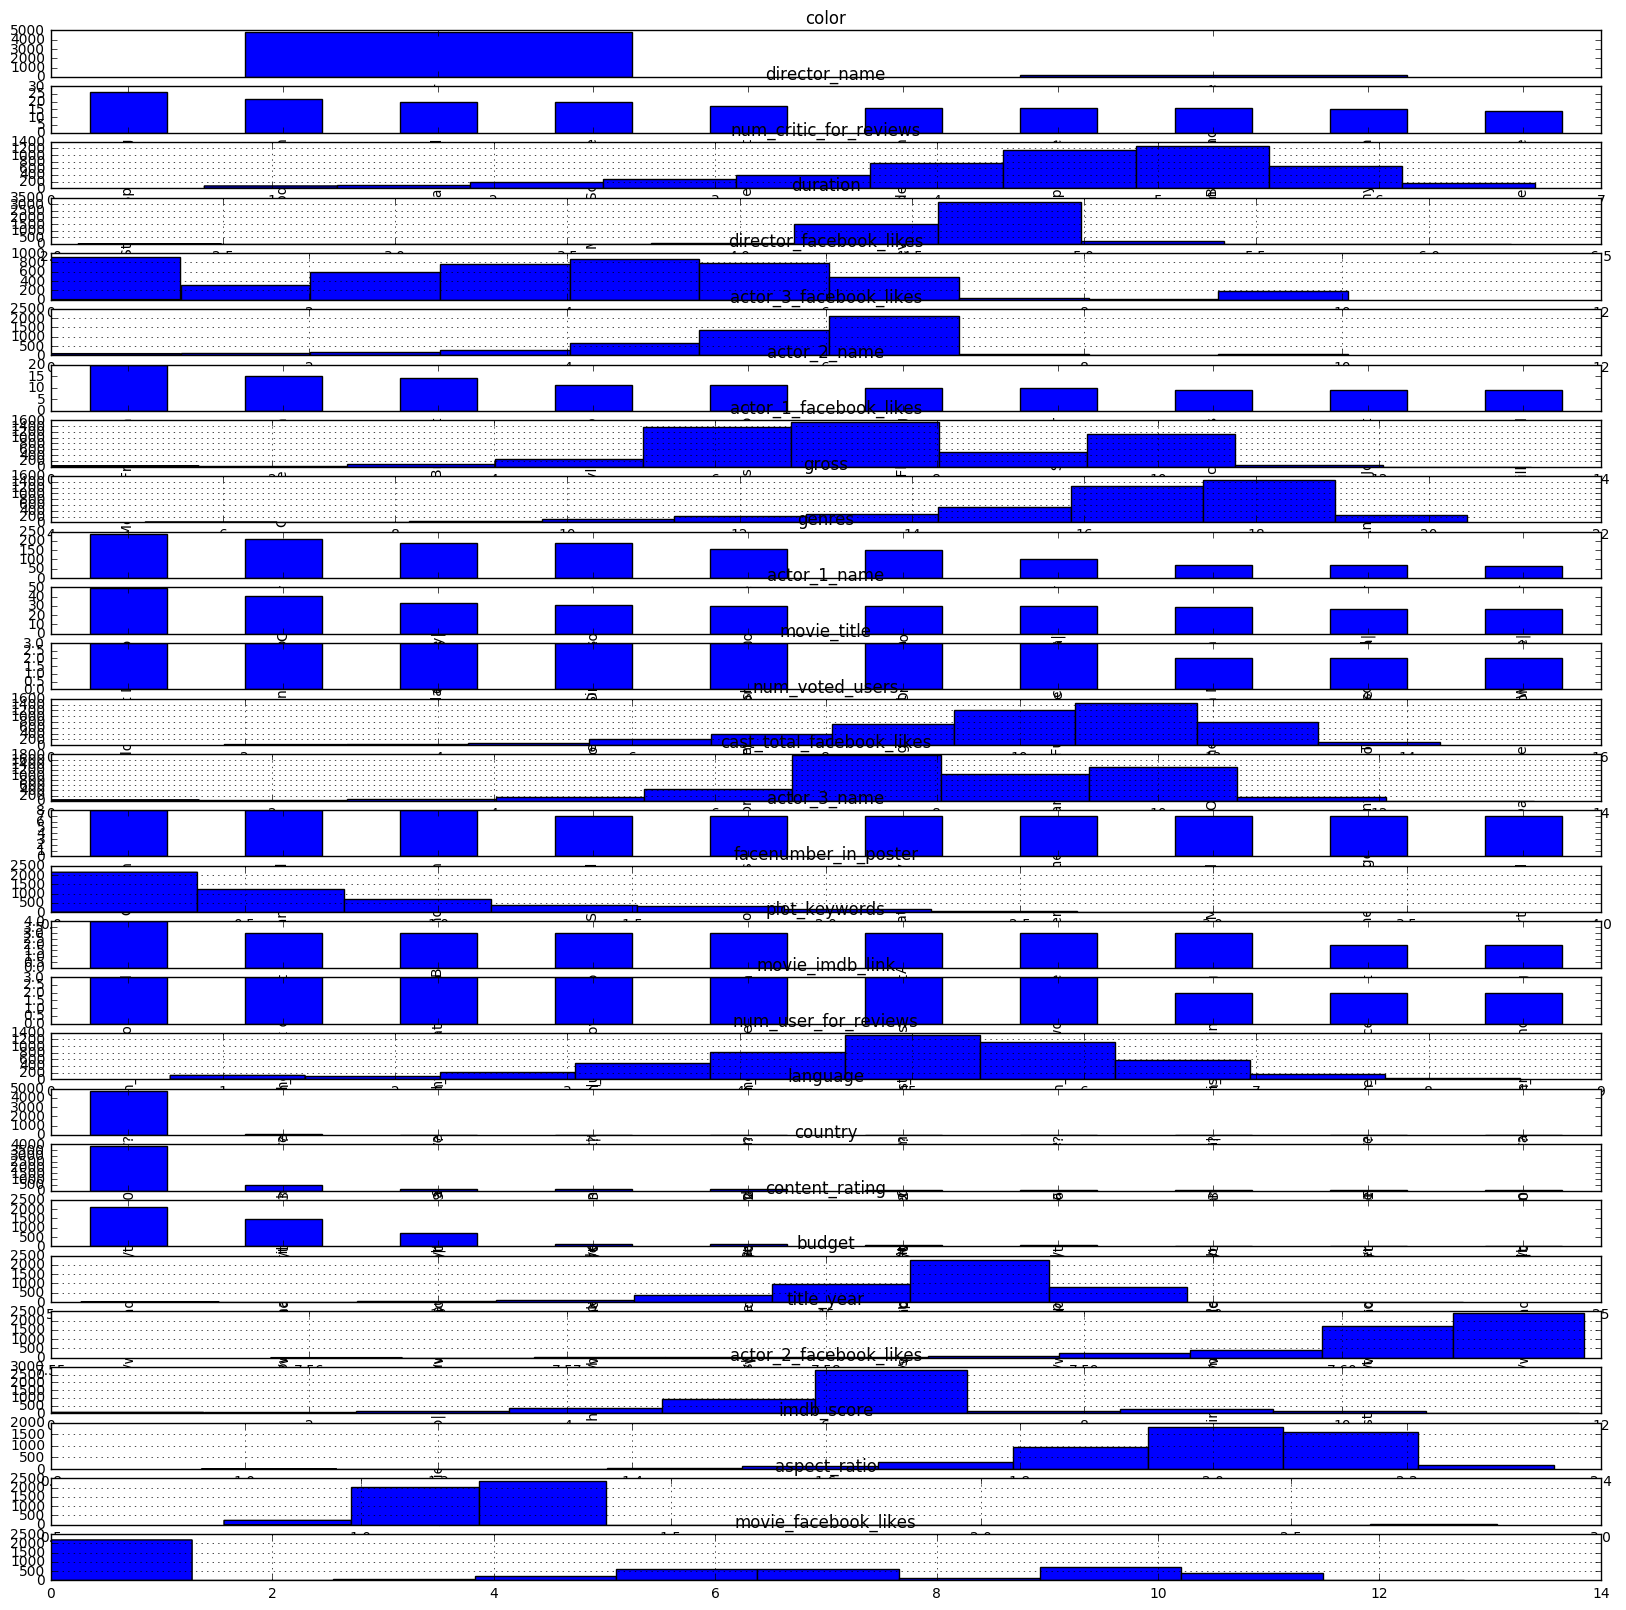

In [5]:
def plus_one_log(g):
    return np.log(g+1)

#Note log scale plots
figure(figsize=(20,20))
for i in range(len(imdb.columns)):
    subplot(len(imdb.columns), 1, i+1)
    c = imdb.columns[i]
    if imdb[c].dtype in ['str', 'object']:
        vals = imdb[c].value_counts().sort_values(ascending=False).head(10)
        vals.plot.bar()
        title(c)
    else:
        imdb[c].apply(plus_one_log).hist()
        title(c)

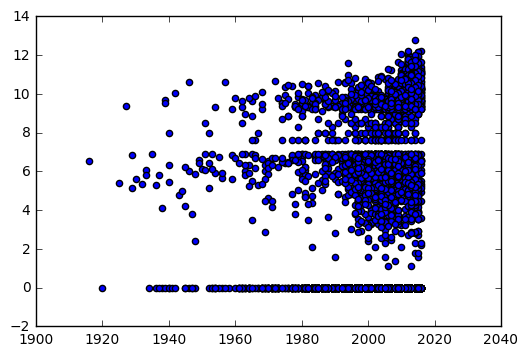

In [6]:
#note old vs new films, weird discontinuity in likes
scatter(imdb.title_year, np.log(imdb.movie_facebook_likes + 1))

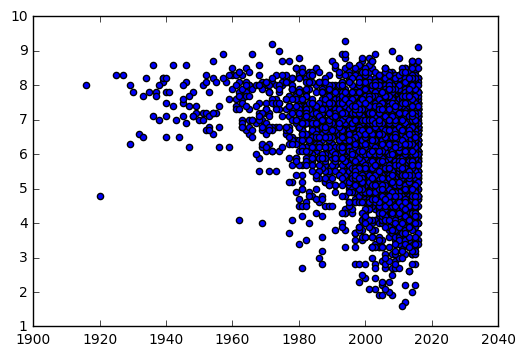

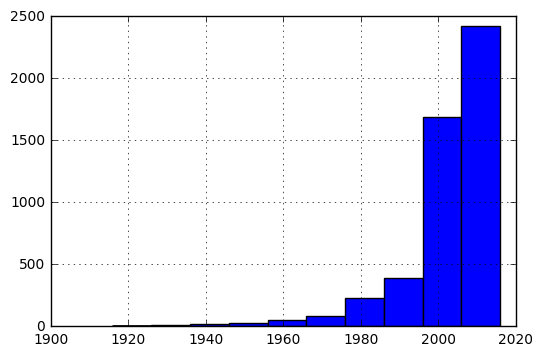

In [7]:
#note old movies getting skewed (high) scores. Old movies are in IMDB only if good enough to remember
scatter(imdb.title_year, imdb.imdb_score)

figure()
imdb.title_year.hist()

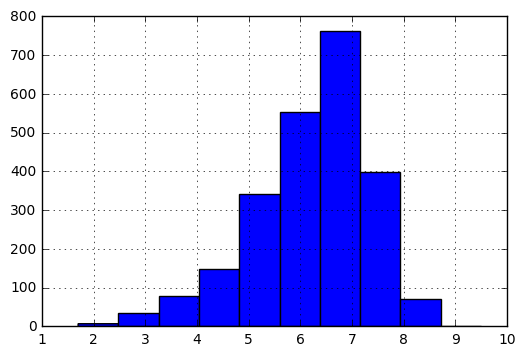

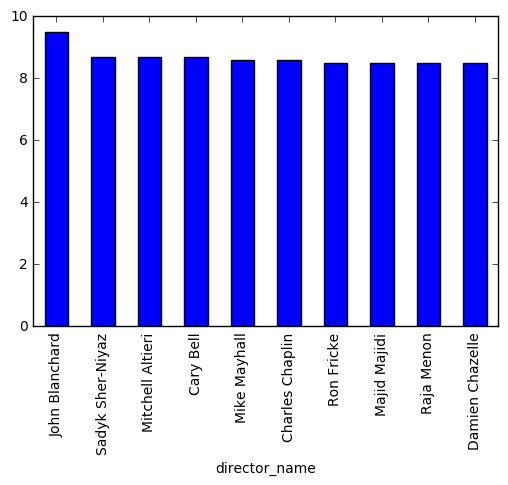

In [8]:
# directors with highest average scores

avg_score_per_director = imdb.groupby('director_name').imdb_score.mean().sort_values(ascending=False)

avg_score_per_director.hist()
figure()
avg_score_per_director.head(10).plot.bar()



In [9]:
imdb.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [10]:
def get_past_score_per_director(g):
    direcor = g.director_name
    year = g.title_year
    past_mean_movie_score = imdb[(imdb.director_name == direcor) & (imdb.title_year < year)].imdb_score.mean()
    
    return past_mean_movie_score

pds = imdb.apply(get_past_score_per_director, axis=1)
pds.head()

0    7.916667
1    7.025000
2    7.600000
3    8.383333
4         NaN
dtype: float64

In [11]:
imdb['past_dir_score'] = pds

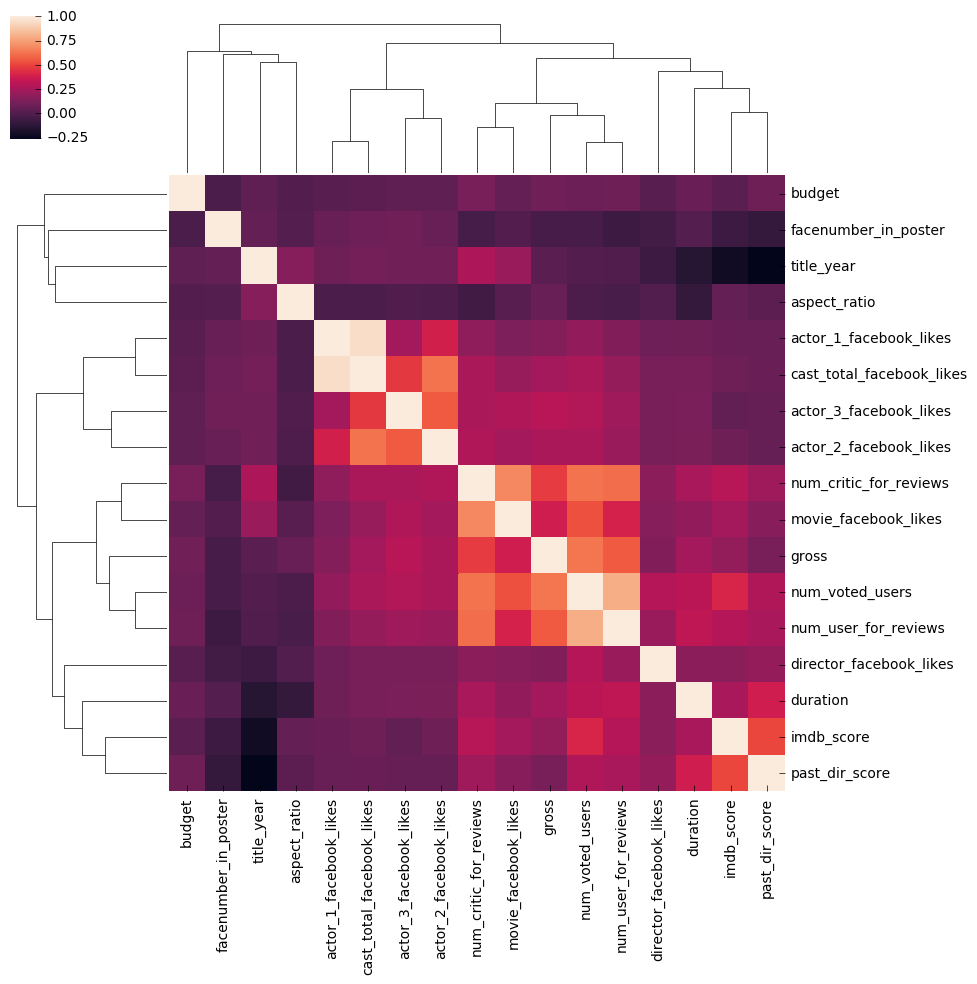

In [12]:
corrs = imdb.corr()
sns.clustermap(corrs)


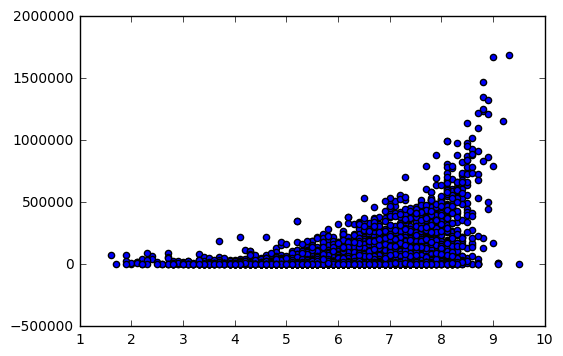

In [13]:
scatter(imdb.imdb_score, imdb.num_voted_users)

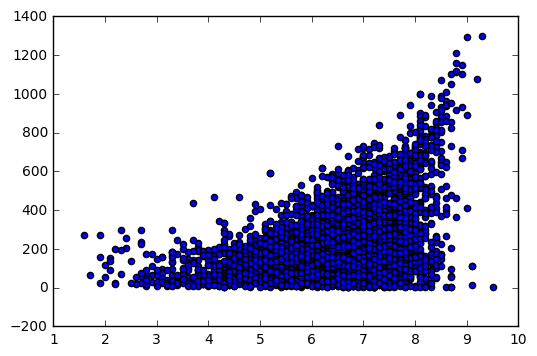

In [14]:
imdb['sqrt_num_voted_users'] = np.sqrt(imdb.num_voted_users)
scatter(imdb.imdb_score, imdb.sqrt_num_voted_users)

(0.58386075633761703, 0.0)

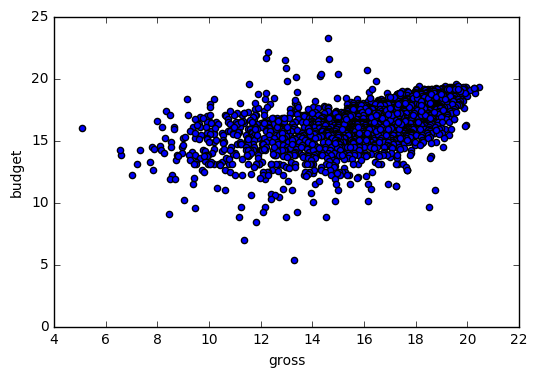

In [15]:

gb = imdb[(imdb.gross > 0) & (imdb.budget > 0)][['gross', 'budget']]

scatter(np.log(gb.gross), np.log(gb.budget))
xlabel('gross')
ylabel('budget')

gb.head()

stats.pearsonr(np.log(gb.gross), np.log(gb.budget))

In [16]:
imdb['log_budget'] = np.log(imdb.budget)
imdb['log_gross'] = np.log(imdb.gross)


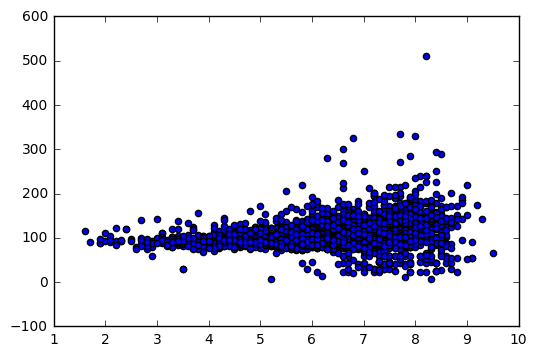

In [17]:
scatter(imdb.imdb_score, imdb.duration)

In [18]:
imdb.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes',
       u'past_dir_score', u'sqrt_num_voted_users', u'log_budget',
       u'log_gross'],
      dtype='object')

### PCA

In [19]:
num_imdb = imdb.select_dtypes(exclude=['object'])

print num_imdb.columns

Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes', u'gross',
       u'num_voted_users', u'cast_total_facebook_likes',
       u'facenumber_in_poster', u'num_user_for_reviews', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'imdb_score',
       u'aspect_ratio', u'movie_facebook_likes', u'past_dir_score',
       u'sqrt_num_voted_users', u'log_budget', u'log_gross'],
      dtype='object')


In [20]:
num_imdb.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,past_dir_score,sqrt_num_voted_users,log_budget,log_gross
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,7.916667,941.384087,19.283571,20.449494
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,7.025000,686.454660,19.519293,19.550159
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,7.600000,525.231378,19.316769,19.114199
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,8.383333,1069.736884,19.336971,19.920595
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,2.828427,NaN,NaN


In [21]:
imputer = PDImputer()
scaler = PDStScaler() 
pca = PDPCA(n_components=3)

pca_pipeline = imputer | scaler | trans(pca, out_cols=['pc1', 'pc2', 'pc3'])
pca_pipeline

Pipeline(steps=[('imputer', Adapter[Imputer](axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', Adapter[StandardScaler](copy=True, with_mean=True, with_std=True)), ('functiontransformer', FunctionTransformer(func=Adapter[PCA](copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False),
          in_cols=None, kw_args=None, out_cols=['pc1', 'pc2', 'pc3'],
          pass_y=False))])

In [22]:
pca_imdb = pca_pipeline.fit_transform(num_imdb)

In [23]:
pca_imdb.head()

,pc1,pc2,pc3
0,12.945233,-5.660100,-2.813715
1,6.858051,0.193628,-0.353285
2,5.987020,-1.891775,-1.990019
3,20.574535,3.065326,2.175054
4,-0.990240,-0.535242,0.018836


In [24]:
pca.explained_variance_ratio_

array([ 0.28645084,  0.11098869,  0.07963136])

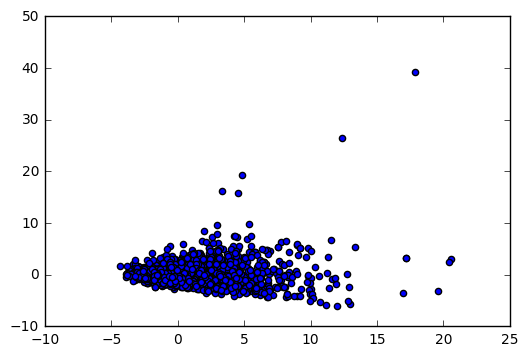

In [25]:
scatter(pca_imdb['pc1'], pca_imdb['pc2'])

In [26]:
imdb_and_pca = pd.concat([imdb, pca_imdb], axis=1)
imdb_and_pca.shape

(5043, 35)

### Cluster

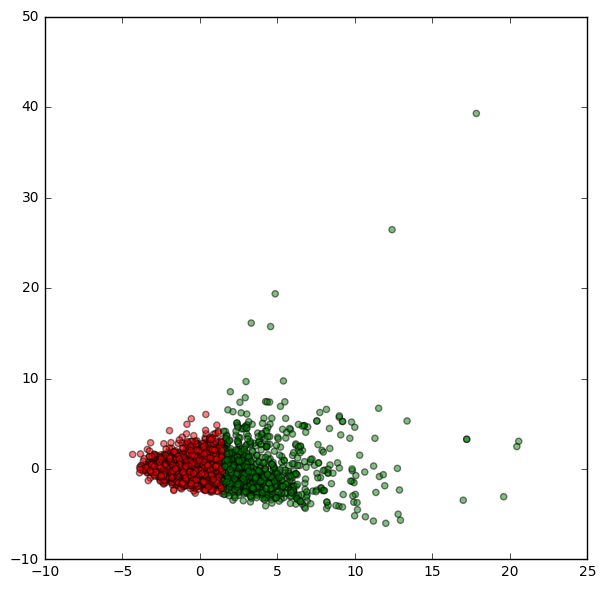

In [27]:
#no interesting clustering here

kmeans = PDKmeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_imdb)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_imdb['pc1'],pca_imdb['pc2'], c= label_color, alpha=0.5) 
plt.show()

In [28]:
#Clustering results seem uninteresting

### predict

In [29]:
imdb.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes',
       u'past_dir_score', u'sqrt_num_voted_users', u'log_budget',
       u'log_gross'],
      dtype='object')

In [30]:
imdb['content_rating'].value_counts().shape

(18,)

In [31]:
imdb_for_prediction = imdb.copy()
imdb_for_prediction = imdb_for_prediction.select_dtypes(exclude=['object'])
# remove columns that have correlated (transformed) columns 
del imdb_for_prediction['budget']
del imdb_for_prediction['gross']
del imdb_for_prediction['num_voted_users']


imdb_for_prediction.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,past_dir_score,sqrt_num_voted_users,log_budget,log_gross
0,723.0,178.0,0.0,855.0,1000.0,4834,0.0,3054.0,2009.0,936.0,7.9,1.78,33000,7.916667,941.384087,19.283571,20.449494
1,302.0,169.0,563.0,1000.0,40000.0,48350,0.0,1238.0,2007.0,5000.0,7.1,2.35,0,7.025000,686.454660,19.519293,19.550159
2,602.0,148.0,0.0,161.0,11000.0,11700,1.0,994.0,2015.0,393.0,6.8,2.35,85000,7.600000,525.231378,19.316769,19.114199
3,813.0,164.0,22000.0,23000.0,27000.0,106759,0.0,2701.0,2012.0,23000.0,8.5,2.35,164000,8.383333,1069.736884,19.336971,19.920595
4,NaN,NaN,131.0,NaN,131.0,143,0.0,NaN,NaN,12.0,7.1,NaN,0,NaN,2.828427,NaN,NaN


In [32]:
make_imputer = lambda : PDImputer()
make_scaler = lambda : PDStScaler()

In [33]:
target = ['imdb_score'] #['log_gross']
features = list(set(imdb_for_prediction.columns.tolist()) - set(target))

print imdb_for_prediction.shape
imdb_for_prediction = imdb_for_prediction[~imdb_for_prediction[target].isnull().any(axis=1)]
print imdb_for_prediction.shape



(5043, 17)
(5043, 17)


In [34]:
linear_predictor = PDLinearRegression()

pipl = make_imputer() | make_scaler() | linear_predictor

In [35]:
scores = pd_model_selection.cross_val_score(
    pipl,
    imdb_for_prediction[features],
    imdb_for_prediction[target],
    cv=5)

print np.mean(np.sqrt(scores))

0.580388090932


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [36]:
pipl.fit(imdb_for_prediction[features],
        imdb_for_prediction[target])

linear_predictor.coef_

array([[-0.22762658,  0.0868403 , -1.05850513,  0.01015026,  0.70346416,
         0.18522464, -0.03392141, -0.1882852 ,  0.1408176 , -0.17730404,
         0.23977997,  0.11068087, -0.18518197,  0.01575891,  0.09943091,
         0.88189713]])

In [37]:
imdb_for_prediction[features].columns

Index([u'num_user_for_reviews', u'num_critic_for_reviews',
       u'cast_total_facebook_likes', u'director_facebook_likes',
       u'sqrt_num_voted_users', u'past_dir_score', u'facenumber_in_poster',
       u'title_year', u'duration', u'log_gross', u'actor_2_facebook_likes',
       u'aspect_ratio', u'log_budget', u'movie_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes'],
      dtype='object')

#### non linear predictore

In [38]:
svr_predictor = PDSVR()

svr_pipl = make_imputer() | make_scaler() | svr_predictor

In [39]:
scores = pd_model_selection.cross_val_score(
    svr_pipl,
    imdb_for_prediction[features],
    imdb_for_prediction[target],
    cv=5)

print np.mean(np.sqrt(scores))

/Users/taliraveh/Library/Python/2.7/lib/python/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.652873668307


In [40]:
gb_predictor = PDGradientBoostingRegressor()

gb_pipl = make_imputer() | make_scaler() | gb_predictor

In [41]:
scores = pd_model_selection.cross_val_score(
    gb_pipl,
    imdb_for_prediction[features],
    imdb_for_prediction[target],
    cv=5)

print np.mean(np.sqrt(scores))

0.676152694447


In [42]:
gb_pipl.fit(imdb_for_prediction[features],
            imdb_for_prediction[target])

gb_predictor.feature_importances_

num_user_for_reviews         0.095808
num_critic_for_reviews       0.059088
cast_total_facebook_likes    0.037411
director_facebook_likes      0.022167
sqrt_num_voted_users         0.215859
past_dir_score               0.054919
facenumber_in_poster         0.016564
title_year                   0.079523
duration                     0.099212
log_gross                    0.049199
actor_2_facebook_likes       0.015891
aspect_ratio                 0.009800
log_budget                   0.125738
movie_facebook_likes         0.069440
actor_3_facebook_likes       0.027869
actor_1_facebook_likes       0.021514
dtype: float64